<a href="https://colab.research.google.com/github/berthine/SIAM-Summer-School/blob/main/SIAM2021_Autodiffrentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical: Introduction to autodifferentiation
(19/July/2021)

### 2021 Gene Golub SIAM Summer School 
https://sites.google.com/aims.ac.za/g2s3/home 

Instructor

<font color="green">***Dr. Emmanuel Dufourq*** 

www.emmanueldufourq.com

edufourq (['@']) gmail.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2021***

Material adapted from:

https://d2l.ai/chapter_preliminaries/autograd.html

https://www.tensorflow.org/guide/autodiff

## <font color="green"> Learning outcomes:

* autodifferentiation using ```tf.GradientTape```

* computing gradients


## <font color="green">Tasks for participants (boolean)?

* No, follow along and make your own modifications and make sure you understand


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### To differentiate automatically, TensorFlow needs to remember what operations happen in what order during the forward pass. Then, during the backward pass, TensorFlow traverses this list of operations in reverse order to compute gradients.

TensorFlow provides the tf.GradientTape API for automatic differentiation; that is, computing the gradient of a computation with respect to some inputs, usually tf.Variables. 

API: https://www.tensorflow.org/api_docs/python/tf/GradientTape

Let's define a variable

In [ ]:
x = tf.Variable(3.0)

In [ ]:
# Record all computations onto a tape
with tf.GradientTape() as tape:
  y = x**2

Once you've recorded some operations, use GradientTape.gradient(target, sources) to calculate the gradient of some target (often a loss) relative to some source (often the model's variables)

In [ ]:
dy_dx = tape.gradient(y, x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

Gradient tapes use memory to store intermediate results, including inputs and outputs, for use during the backwards pass. By default, the resources held by a GradientTape are released as soon as the GradientTape.gradient method is called. To compute multiple gradients over the same computation, create a gradient tape with persistent=True.

In [ ]:
x = tf.constant([1, 3.0])
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  y = x * x
  z = y * y

print(tape.gradient(z, x).numpy())  # 108.0 (4 * x**3 at x = 3)
print(tape.gradient(y, x).numpy())  # 6.0 (2 * x)

[  4. 108.]
[2. 6.]


Another example

In [ ]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

In [ ]:
w

<tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[ 1.2121017 , -1.0957193 ],
       [-0.03455495,  0.11712792],
       [ 0.05705649, -1.4997364 ]], dtype=float32)>

In [ ]:
x

[[1.0, 2.0, 3.0]]

In [ ]:
b

<tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [ ]:
tf.linalg.matmul(x,w) + b

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 1.3141613, -5.360673 ]], dtype=float32)>

In [ ]:
with tf.GradientTape(persistent=True) as tape:

  # Define some loss function
  y = tf.linalg.matmul(x,w) + b
  loss = tf.reduce_mean(y**2)

Compute the gradient of the loss with respect to the data

In [ ]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

In [ ]:
dl_dw

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[  1.3141613,  -5.360673 ],
       [  2.6283226, -10.721346 ],
       [  3.942484 , -16.08202  ]], dtype=float32)>

In [ ]:
dl_db

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 1.3141613, -5.360673 ], dtype=float32)>

Providing a number of source values

In [ ]:
x = tf.linspace(-10.0, 10.0, 200+1)
x

<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([-10.        ,  -9.9       ,  -9.8       ,  -9.7       ,
        -9.6       ,  -9.5       ,  -9.4       ,  -9.3       ,
        -9.2       ,  -9.1       ,  -9.        ,  -8.9       ,
        -8.8       ,  -8.7       ,  -8.6       ,  -8.5       ,
        -8.4       ,  -8.3       ,  -8.2       ,  -8.1       ,
        -8.        ,  -7.8999996 ,  -7.8       ,  -7.7       ,
        -7.6       ,  -7.5       ,  -7.3999996 ,  -7.3       ,
        -7.2       ,  -7.1       ,  -7.        ,  -6.8999996 ,
        -6.8       ,  -6.7       ,  -6.6       ,  -6.5       ,
        -6.3999996 ,  -6.3       ,  -6.2       ,  -6.1       ,
        -6.        ,  -5.9       ,  -5.7999997 ,  -5.7       ,
        -5.6       ,  -5.5       ,  -5.4       ,  -5.2999997 ,
        -5.2       ,  -5.1       ,  -5.        ,  -4.9       ,
        -4.7999997 ,  -4.7       ,  -4.6       ,  -4.5       ,
        -4.4       ,  -4.2999997 ,  -4.2       ,  -4.1       ,
       

 Tensors can be manually watched by invoking the watch method

 Sigmoid function is from here: https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid

In [ ]:
with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.keras.activations.sigmoid(x)

dy_dx = tape.gradient(y, x)

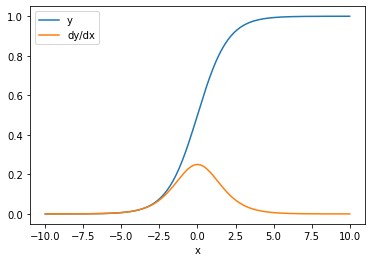

In [ ]:
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')

## Task

Take a look at the API https://www.tensorflow.org/api_docs/python/tf/keras/activations/ and try to compute the derivate for some other functions, .e.g linear, tanh and elu